## CarPrice PREDICTION LINEAR REGRESSION 

In [2]:
#importing all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [26]:
# Loading the data 
CarPrice=pd.read_csv("C:\\Users\\Hannah\\Downloads\\CarPrice_Assignment.csv")
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
CarPrice.shape

(205, 26)

In [28]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Number of instnces:205.
,Number of featers:26,
,Target variable: price

In [4]:
##Checking for missing valuess in the columns
print("Missing reords",(CarPrice.isnull().sum()/len(CarPrice))*100)

Missing reords car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


No missing values

In [5]:
##Descriptive analysis
CarPrice.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.0,52.0,103.0,154.0,205.0
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheelbase,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
carlength,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
carwidth,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3


## EDA

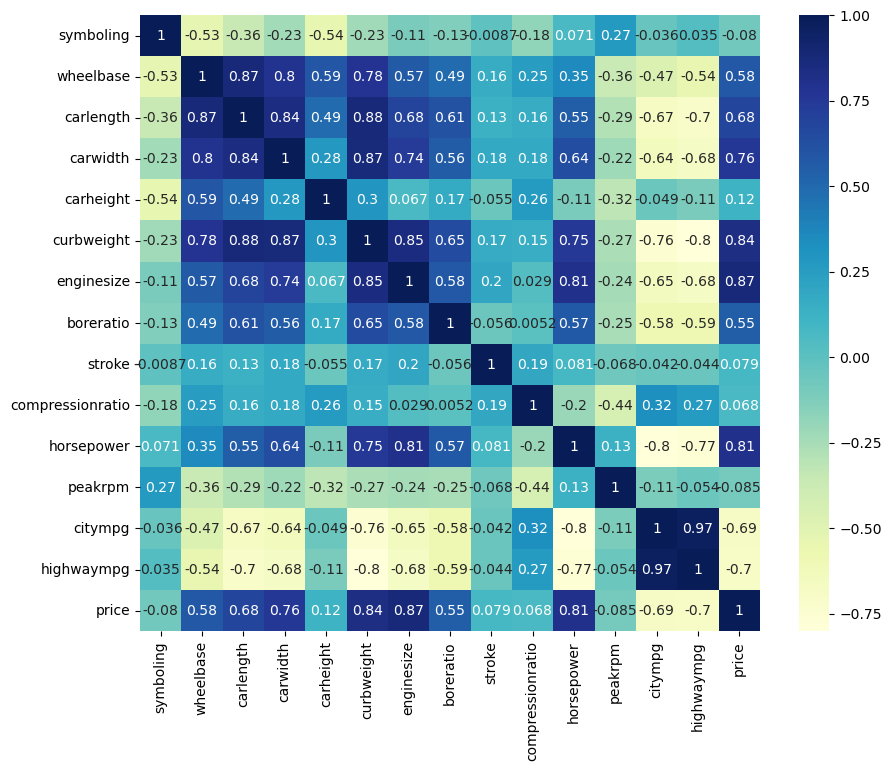

In [31]:
# Select only numeric columns excluding 'car_ID'
numeric_columns = CarPrice.select_dtypes(include='number').drop(columns=['car_ID'])

# Calculate correlation matrix
cor = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

#### The dependent variable price has a high positive correlation with:

horsepower,
enginesize,
curbweight,
carwidth,
carlength,

#### The price(dependent variable) has a high negative correlation with:

highwaympg and
citympg

#### Some of the variables that are highly correlated to the independ variable(price), are also correlated to each other. which are:
##### enginesize with horsepower and curbwidth,
##### curbweigth with enginesize, carwidth and carlength,
##### highwaympg with citympg,

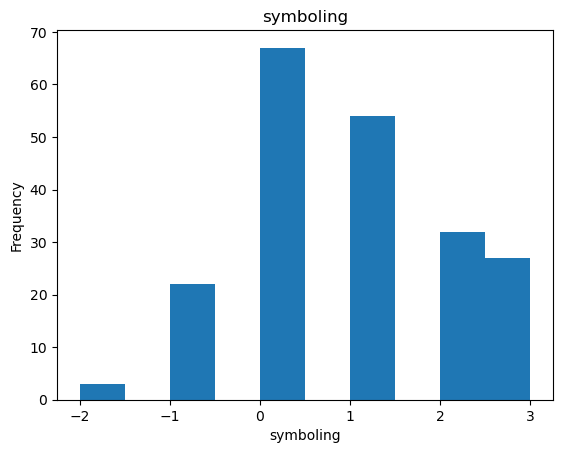

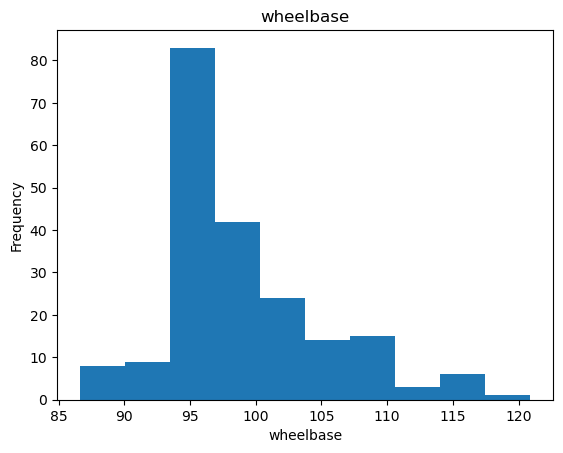

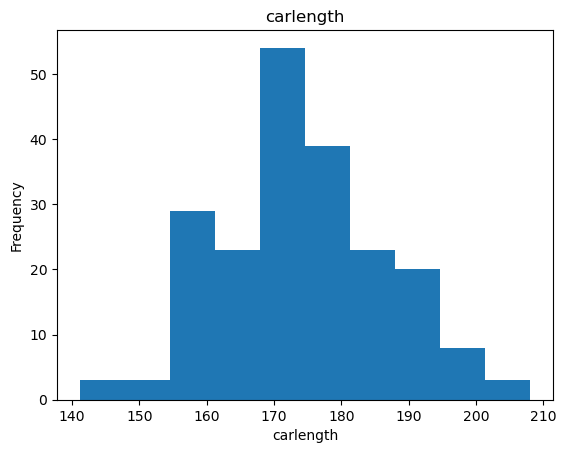

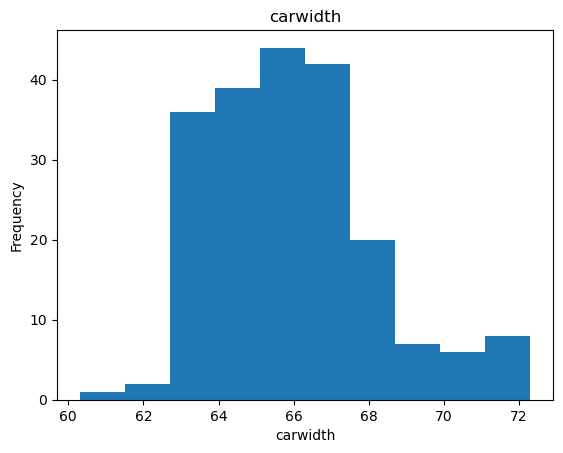

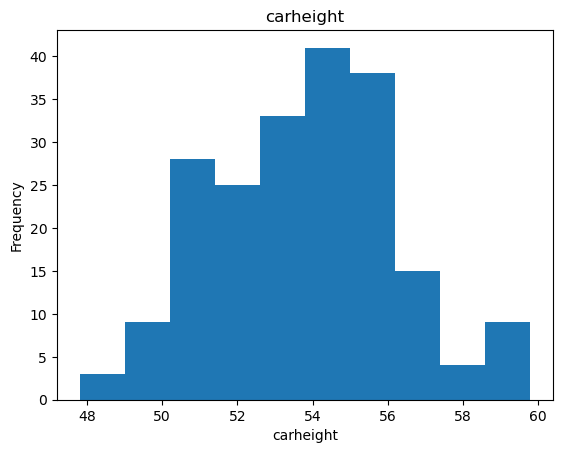

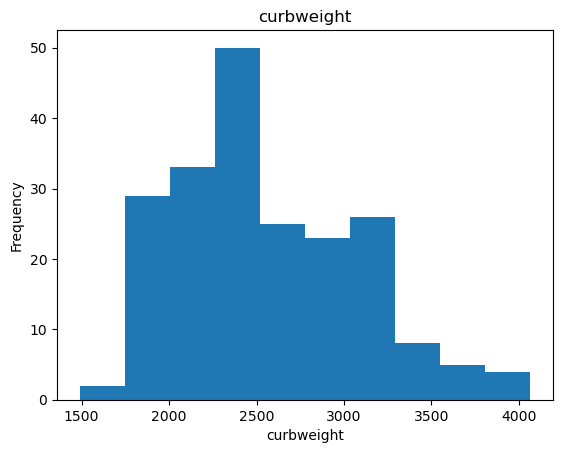

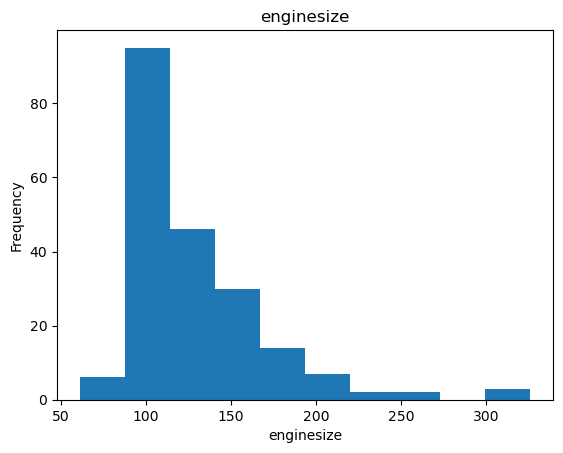

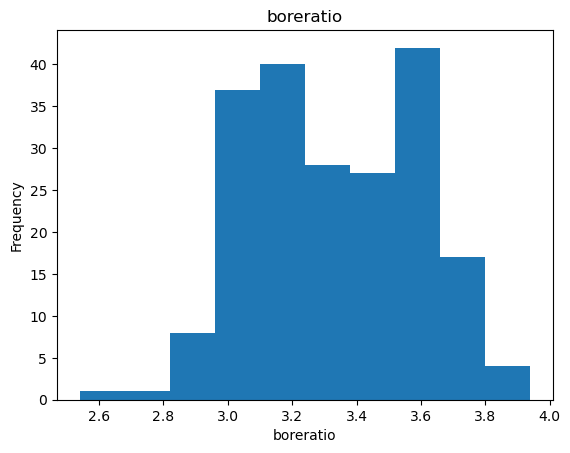

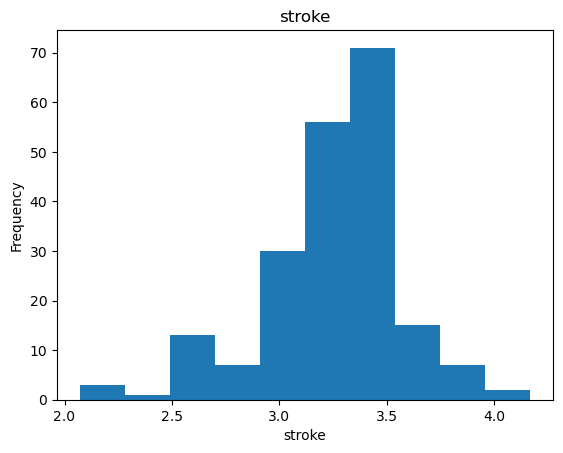

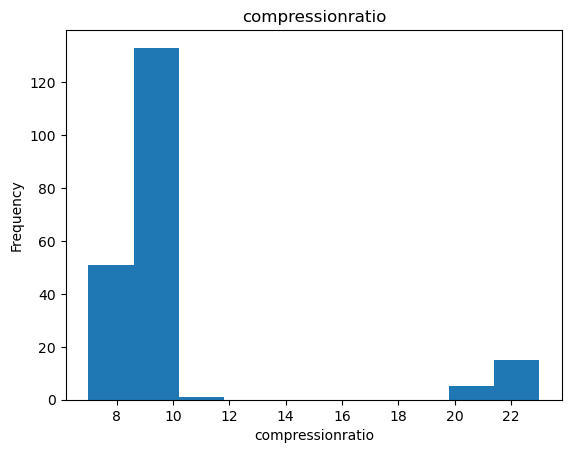

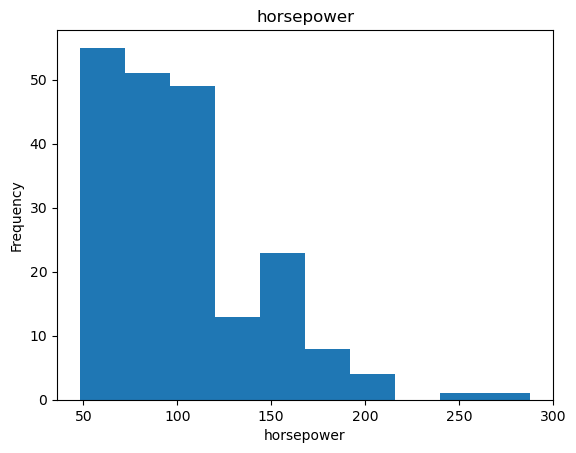

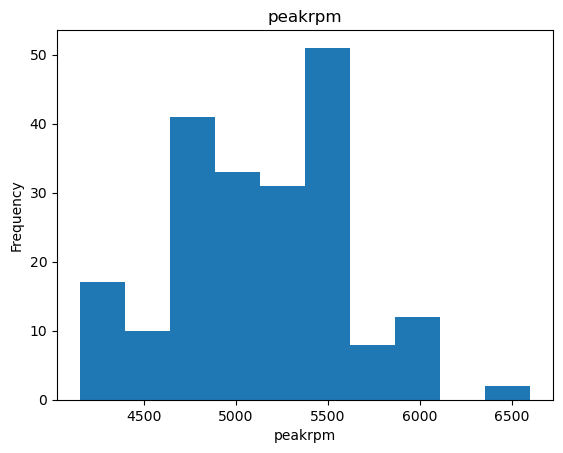

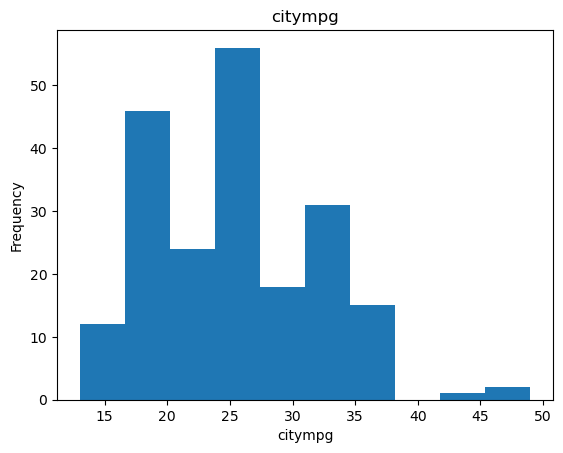

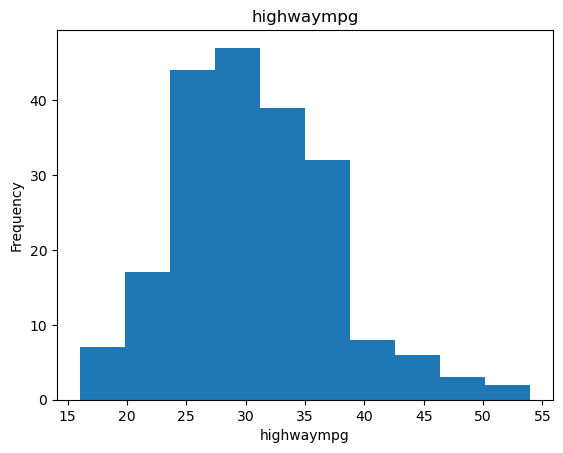

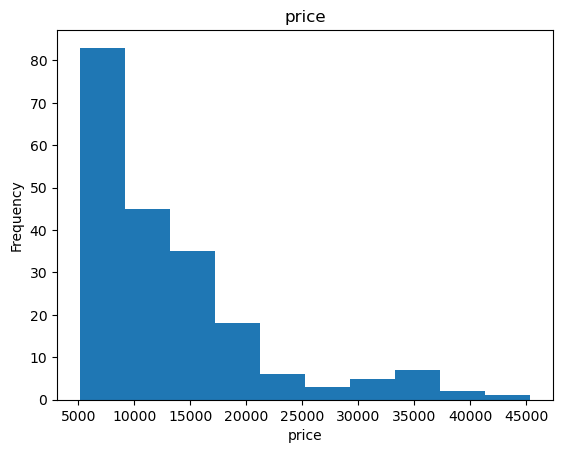

In [34]:
#Trends within categorical variables

numeric_price = CarPrice.select_dtypes(include='number').drop(columns=['car_ID'])

for column in numeric_price.columns:
    # Create a histogram for each numeric column
    plt.hist(CarPrice[column])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    # Show the plot
    plt.show()

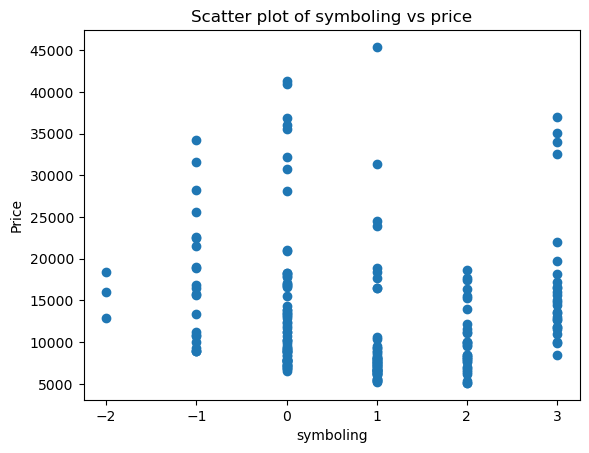

Pearson correlation coefficient between symboling and price: -0.07997822464270347
P-value: 0.2543117584863517


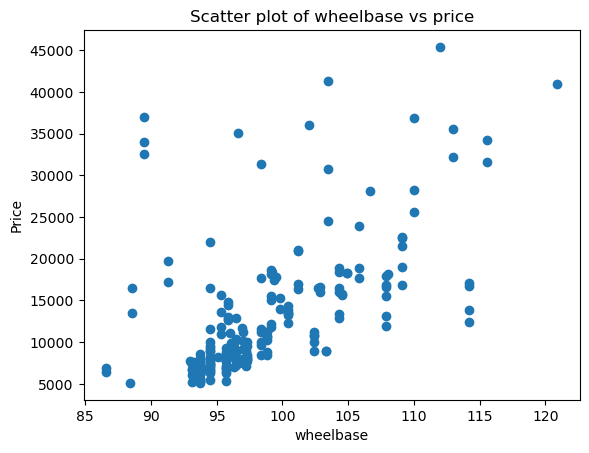

Pearson correlation coefficient between wheelbase and price: 0.57781559829215
P-value: 1.182820486337742e-19


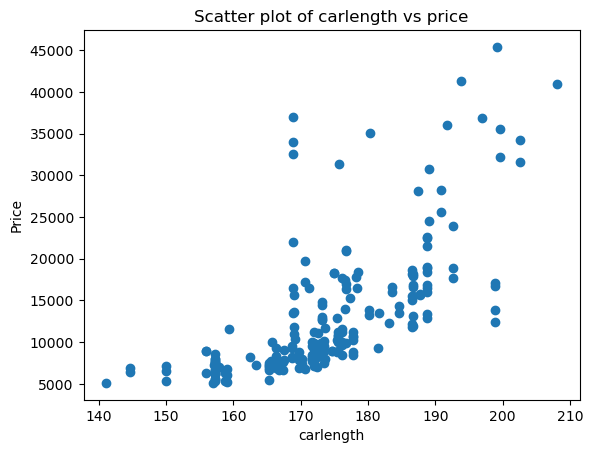

Pearson correlation coefficient between carlength and price: 0.6829200156779622
P-value: 1.6787066240745445e-29


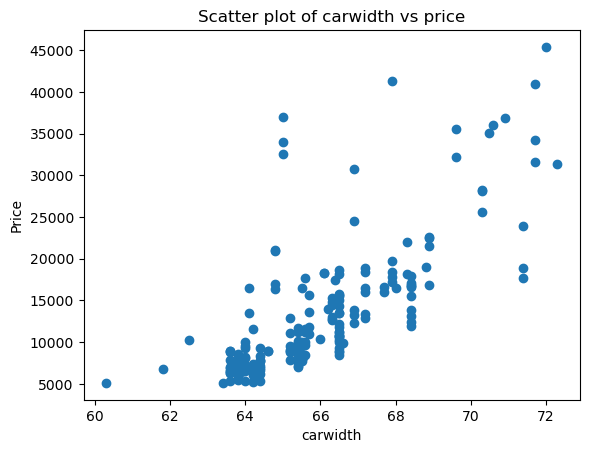

Pearson correlation coefficient between carwidth and price: 0.7593252997415114
P-value: 9.627437876119732e-40


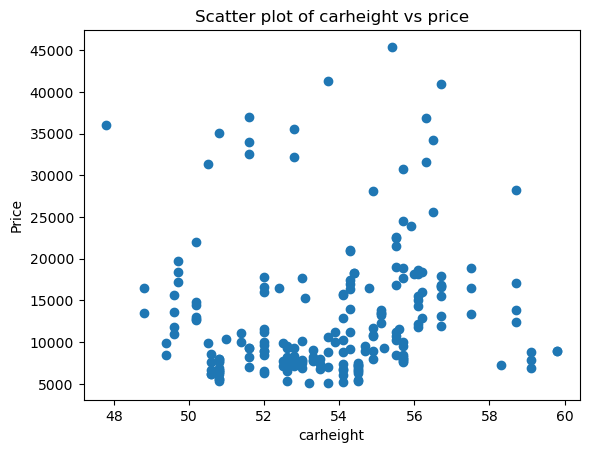

Pearson correlation coefficient between carheight and price: 0.11933622657049443
P-value: 0.08832832352274969


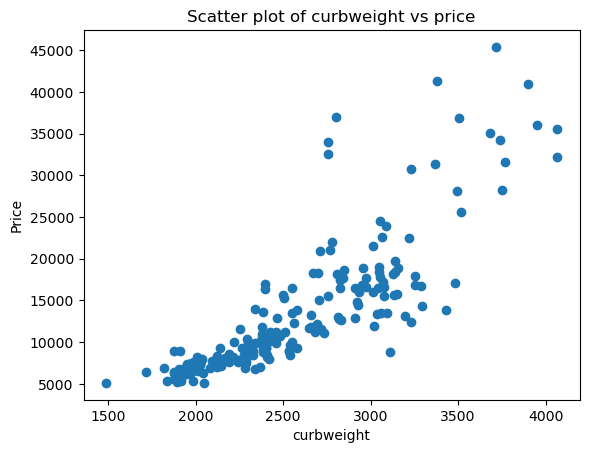

Pearson correlation coefficient between curbweight and price: 0.8353048793372966
P-value: 1.214444826403205e-54


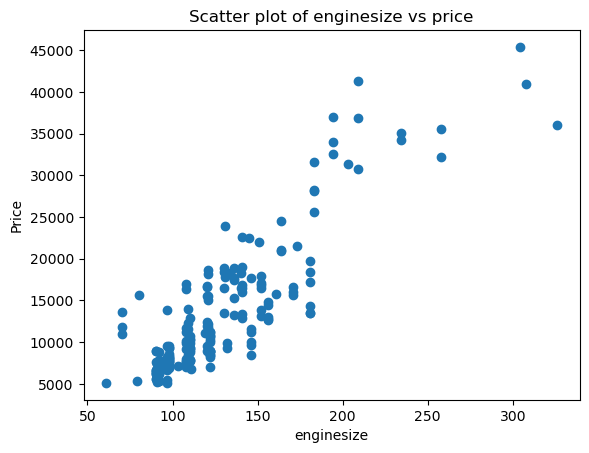

Pearson correlation coefficient between enginesize and price: 0.8741448025245117
P-value: 1.3547637598648963e-65


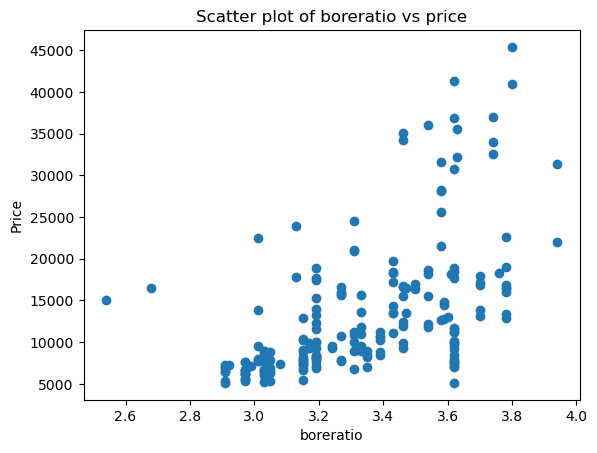

Pearson correlation coefficient between boreratio and price: 0.5531732367984437
P-value: 7.907922278248891e-18


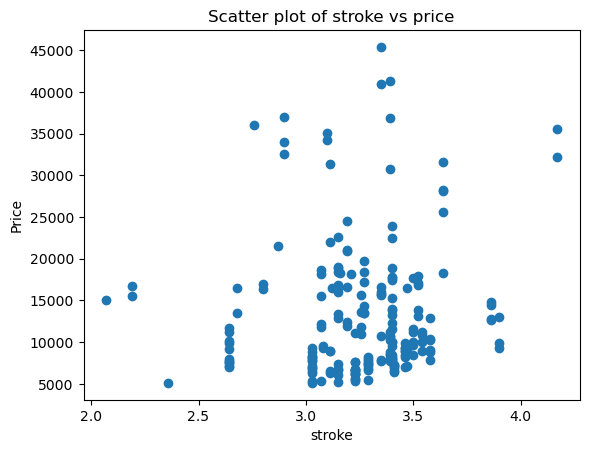

Pearson correlation coefficient between stroke and price: 0.079443083881931
P-value: 0.2575137159090866


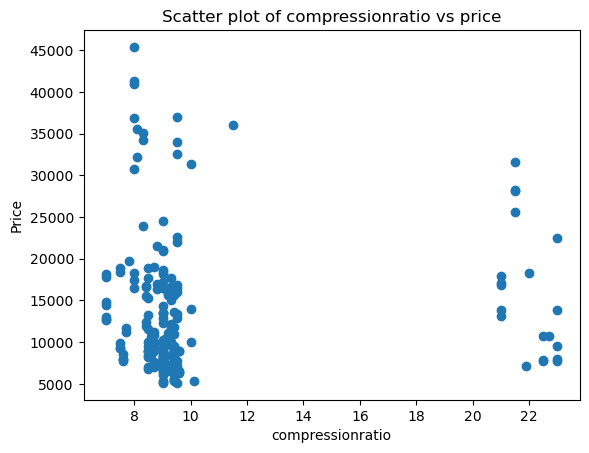

Pearson correlation coefficient between compressionratio and price: 0.06798350579944265
P-value: 0.33277236122380593


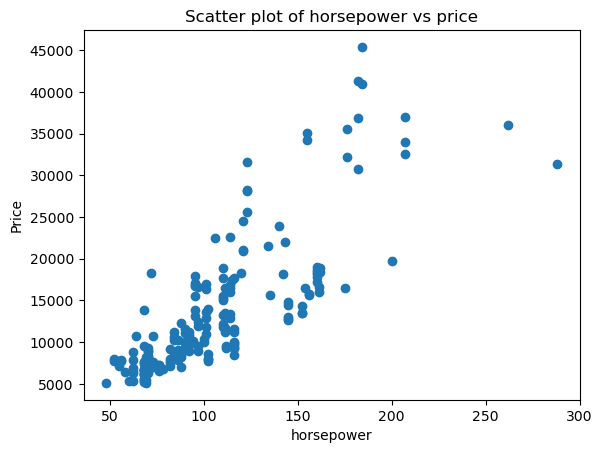

Pearson correlation coefficient between horsepower and price: 0.8081388225362218
P-value: 1.4834365732939093e-48


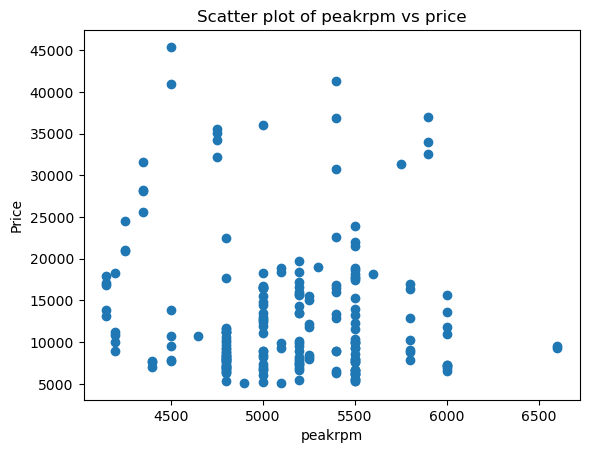

Pearson correlation coefficient between peakrpm and price: -0.08526715027785689
P-value: 0.22414123444666736


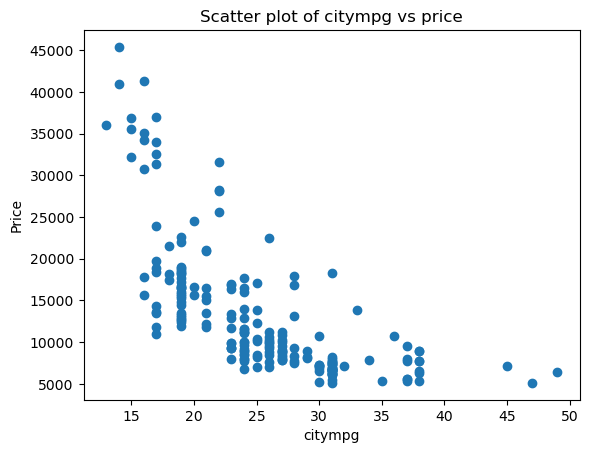

Pearson correlation coefficient between citympg and price: -0.6857513360270397
P-value: 7.978684249663508e-30


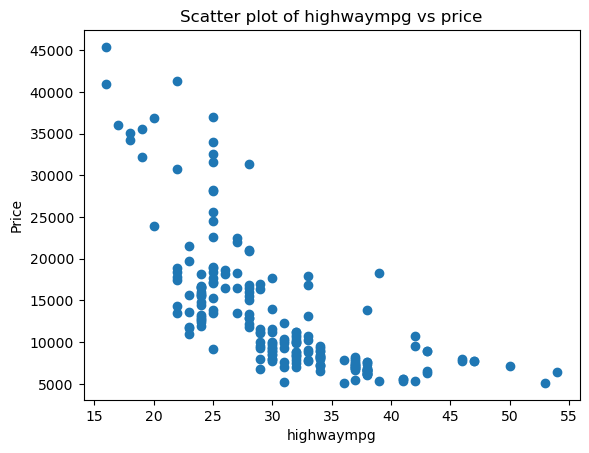

Pearson correlation coefficient between highwaympg and price: -0.6975990916465565
P-value: 3.230681380364471e-31


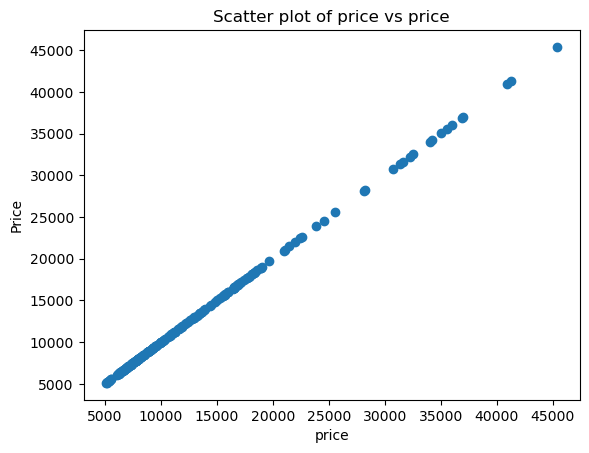

Pearson correlation coefficient between price and price: 1.0
P-value: 0.0


In [35]:
##Producing the scatterplot 
from scipy.stats import pearsonr

y = CarPrice['price']
numeric_price = CarPrice.select_dtypes(include='number').drop(columns=['car_ID'])

for feature in numeric_price:
    # Create scatter plot
    plt.scatter(numeric_price[feature], y)
    plt.title(f'Scatter plot of {feature} vs price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    # Show the plot
    plt.show()
    
    # Calculate Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(numeric_price[feature], y)
    print(f"Pearson correlation coefficient between {feature} and price: {correlation_coefficient}")
    print(f"P-value: {p_value}")

#### Checking the dataset

In [9]:
CarPrice['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

The categorical variable "CarName" comprises two elements: the initial term signifies the 'car company,' while the subsequent term indicates the 'car model.' The focus of model construction will center solely on the car company name, treating it as the independent variable.

In [10]:
CarPrice['car_company'] = CarPrice['CarName'].apply(lambda x: x.split( )[0])
CarPrice.drop('CarName',axis=1,inplace=True)

In [11]:
# Correcting the misspelled company names.
CarPrice['car_company'].replace('maxda','mazda',inplace=True)
CarPrice['car_company'].replace('Nissan','nissan',inplace=True)
CarPrice['car_company'].replace('porcshce','porsche',inplace=True)
CarPrice['car_company'].replace('toyouta','toyota',inplace=True)
CarPrice['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

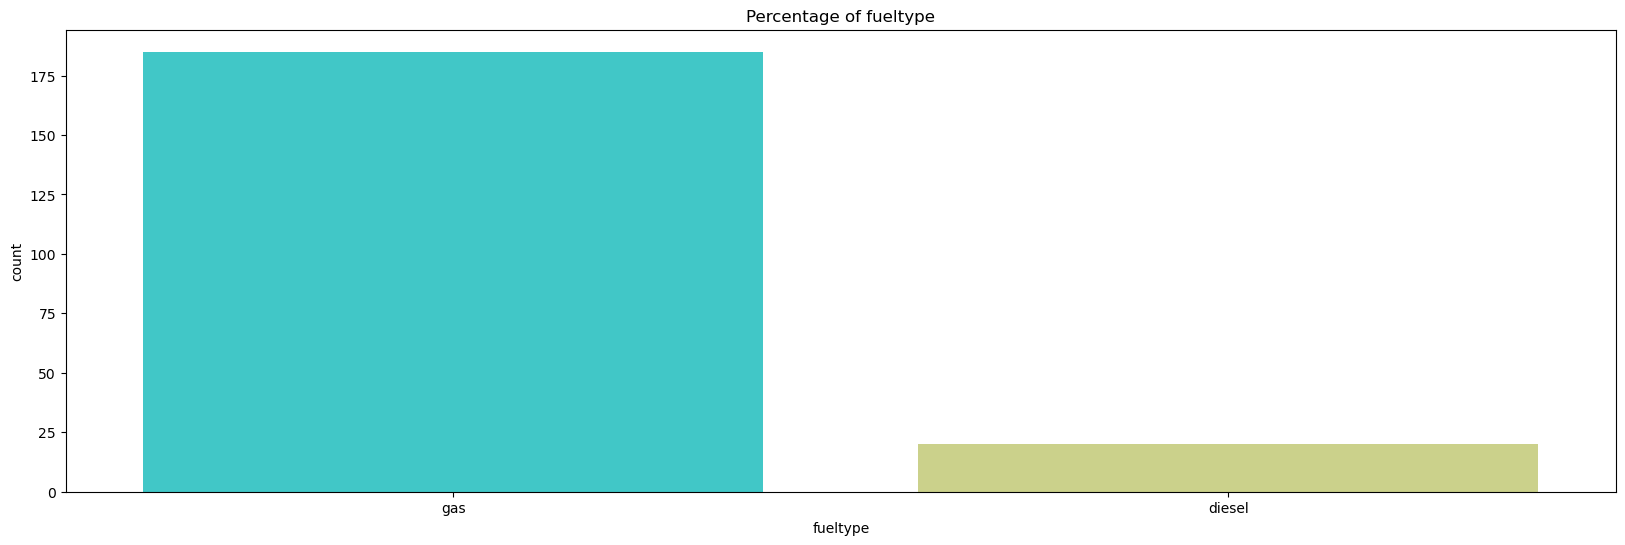

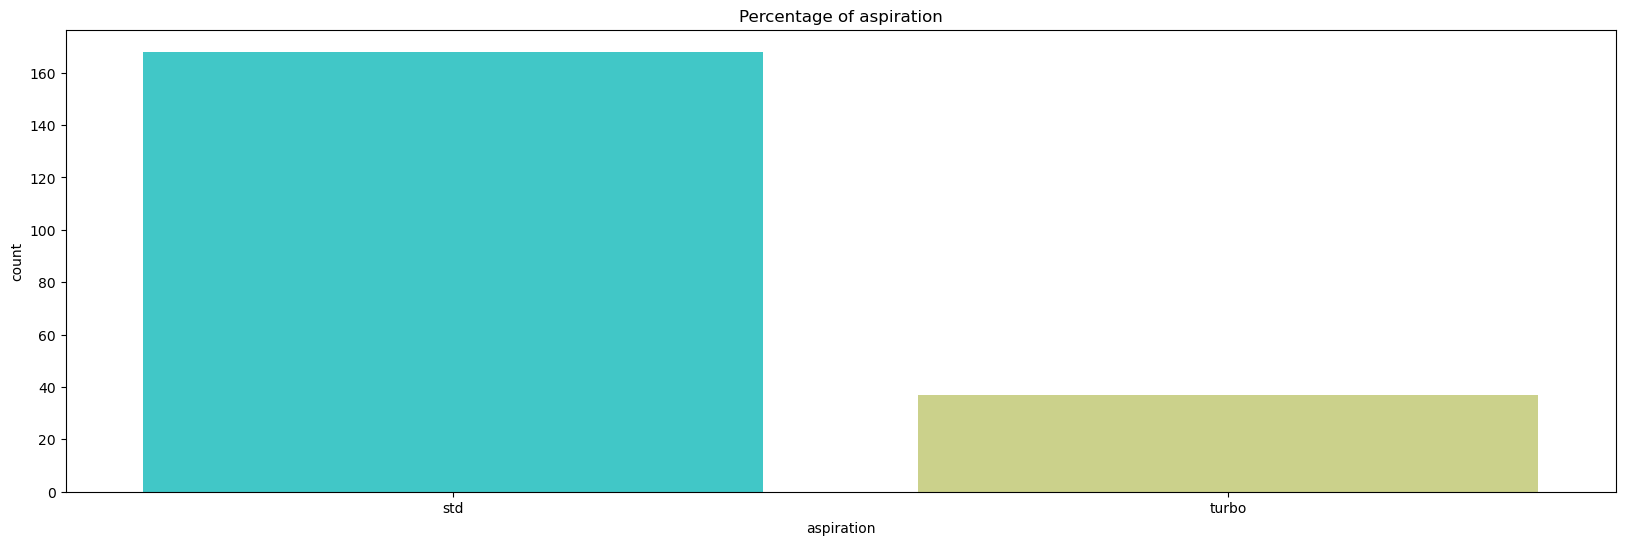

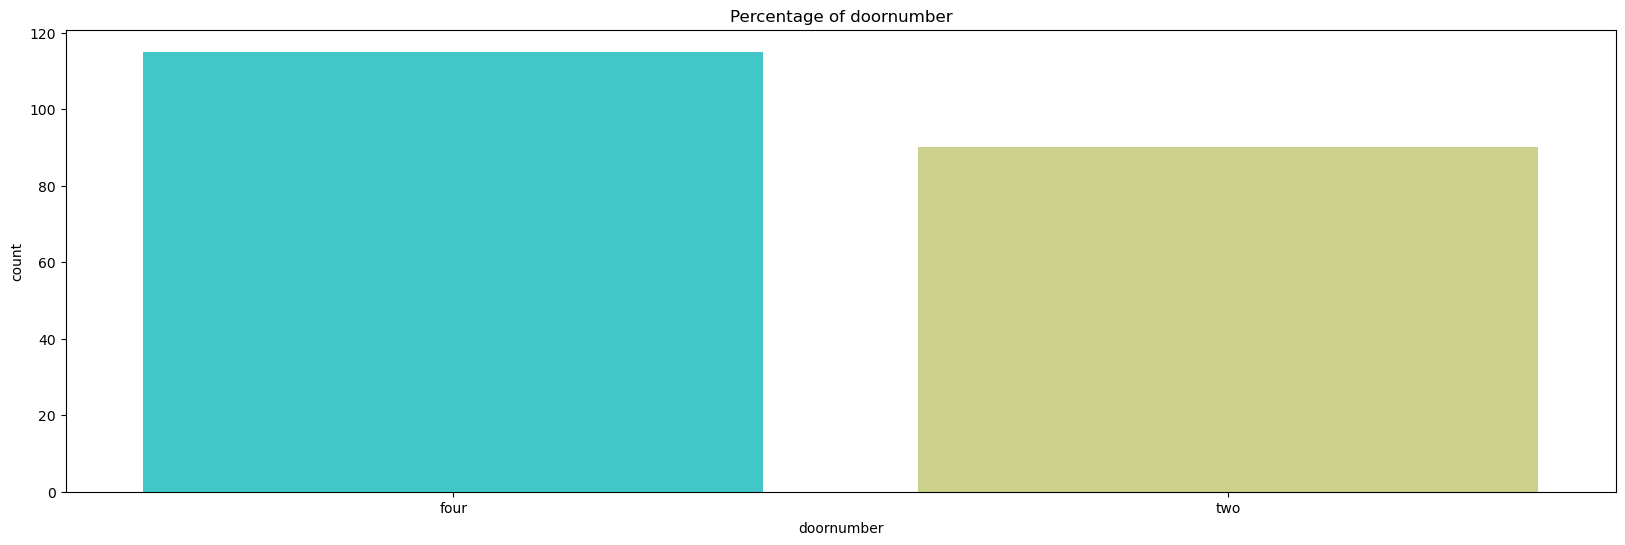

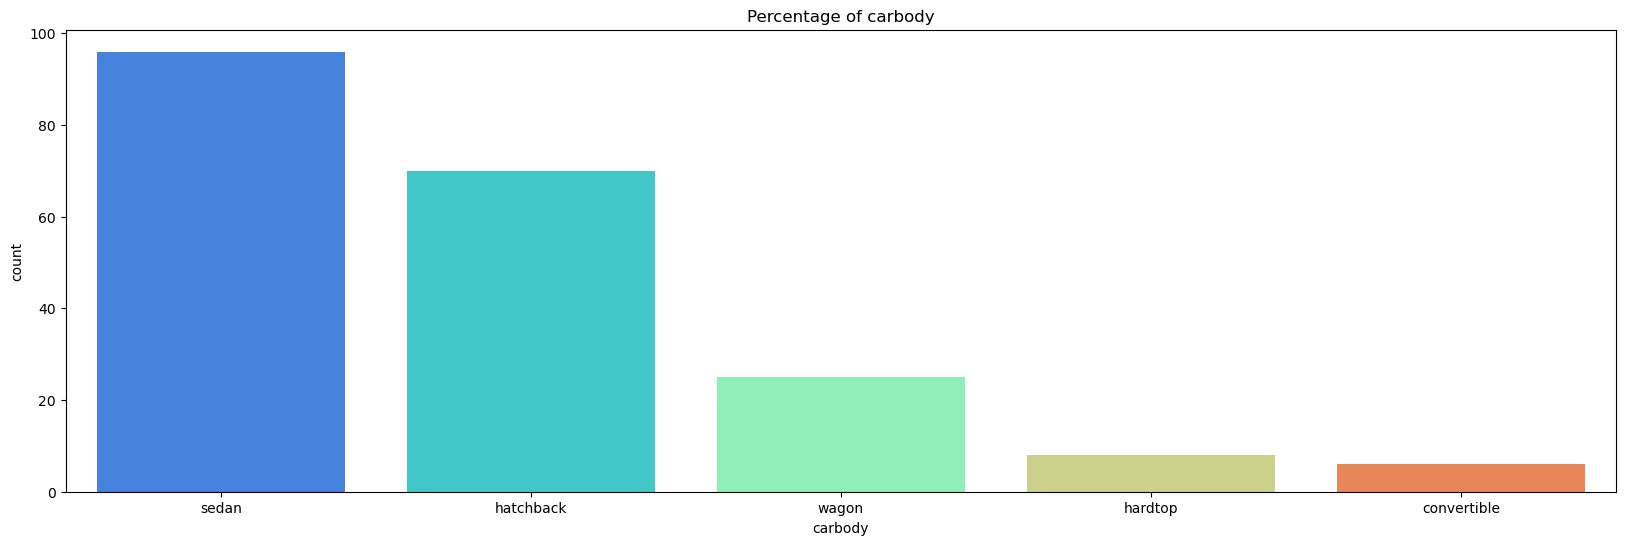

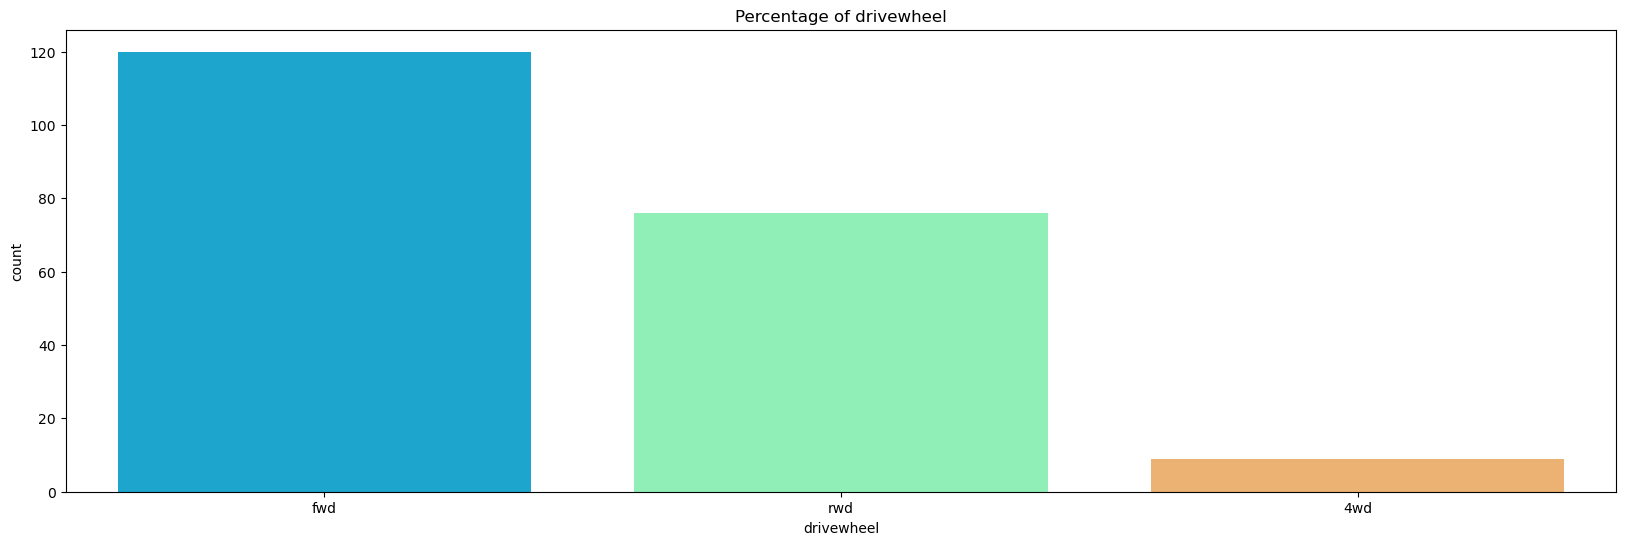

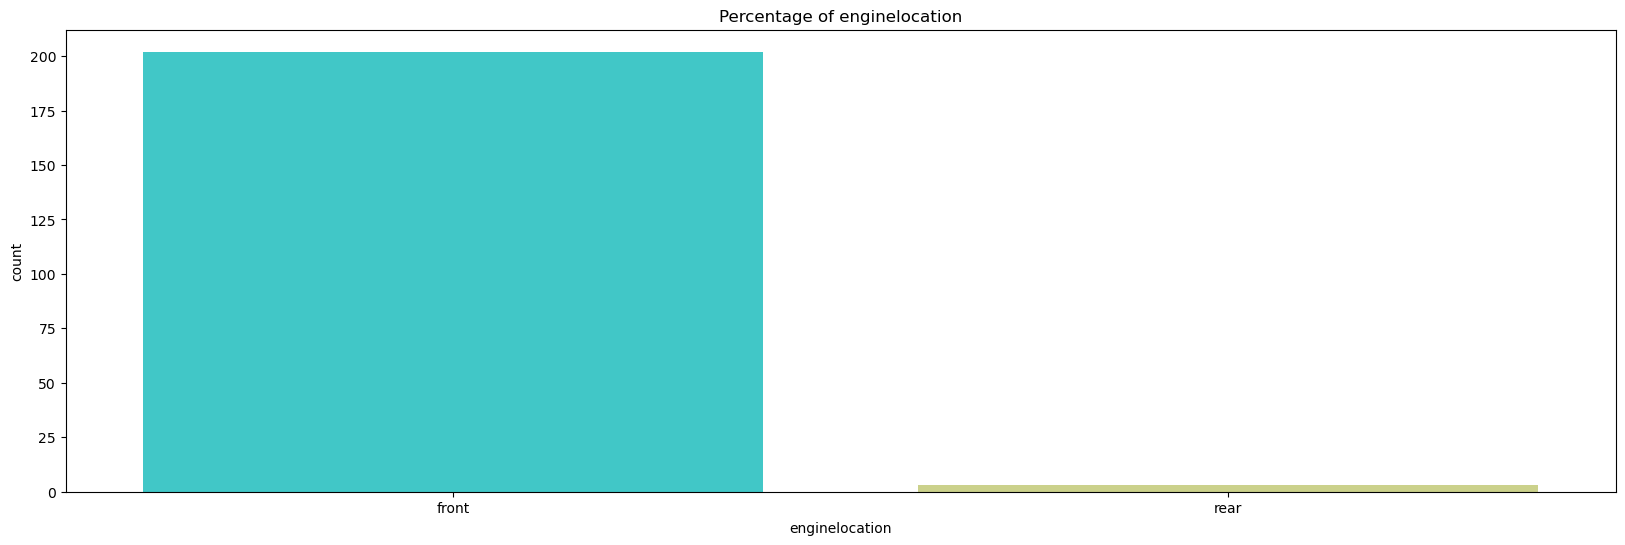

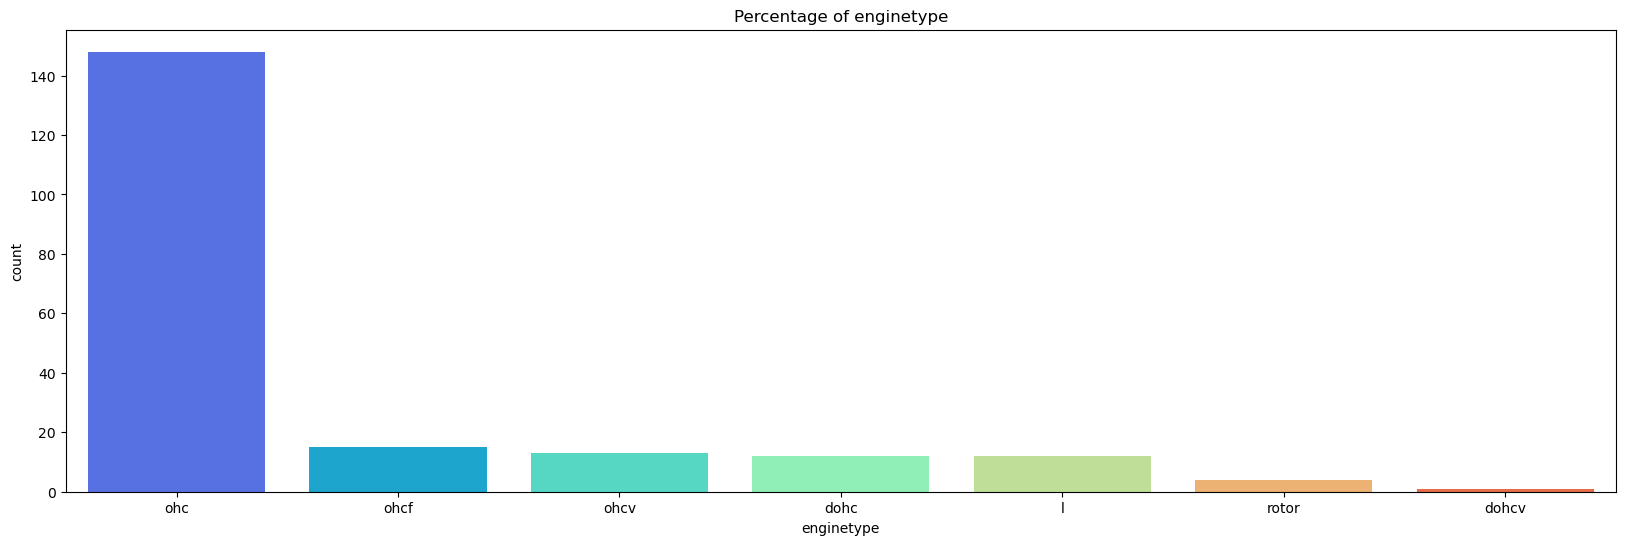

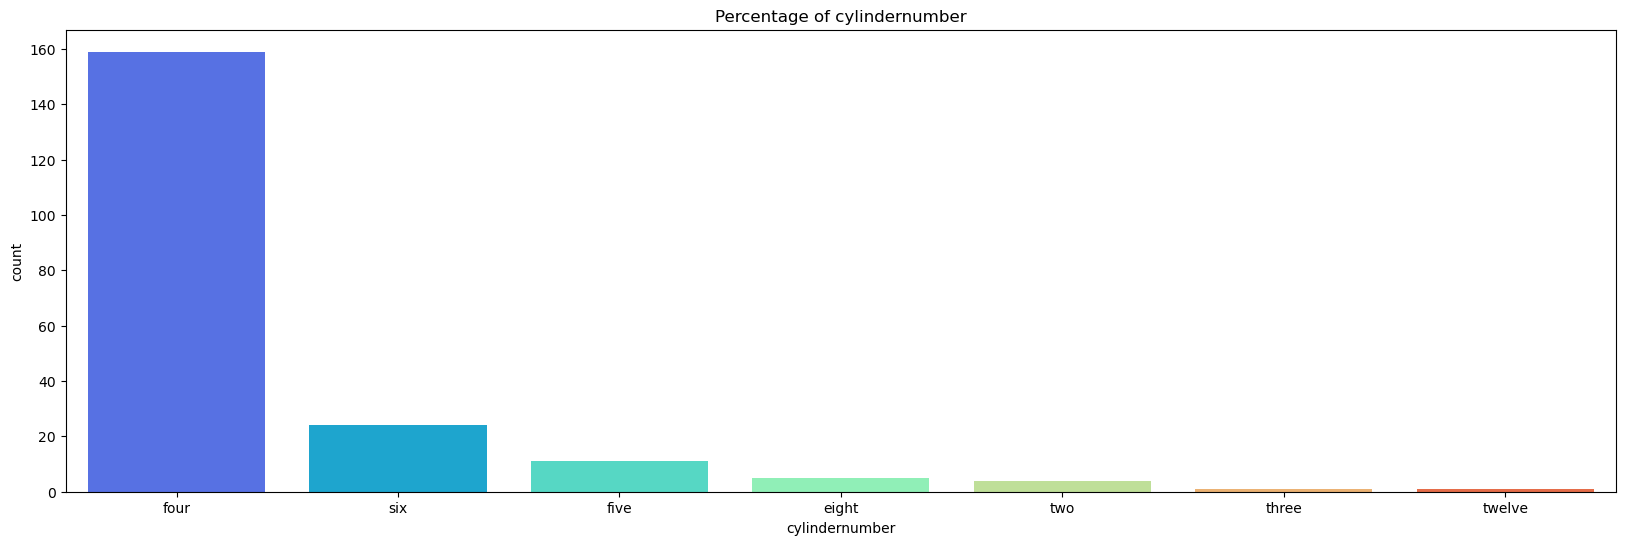

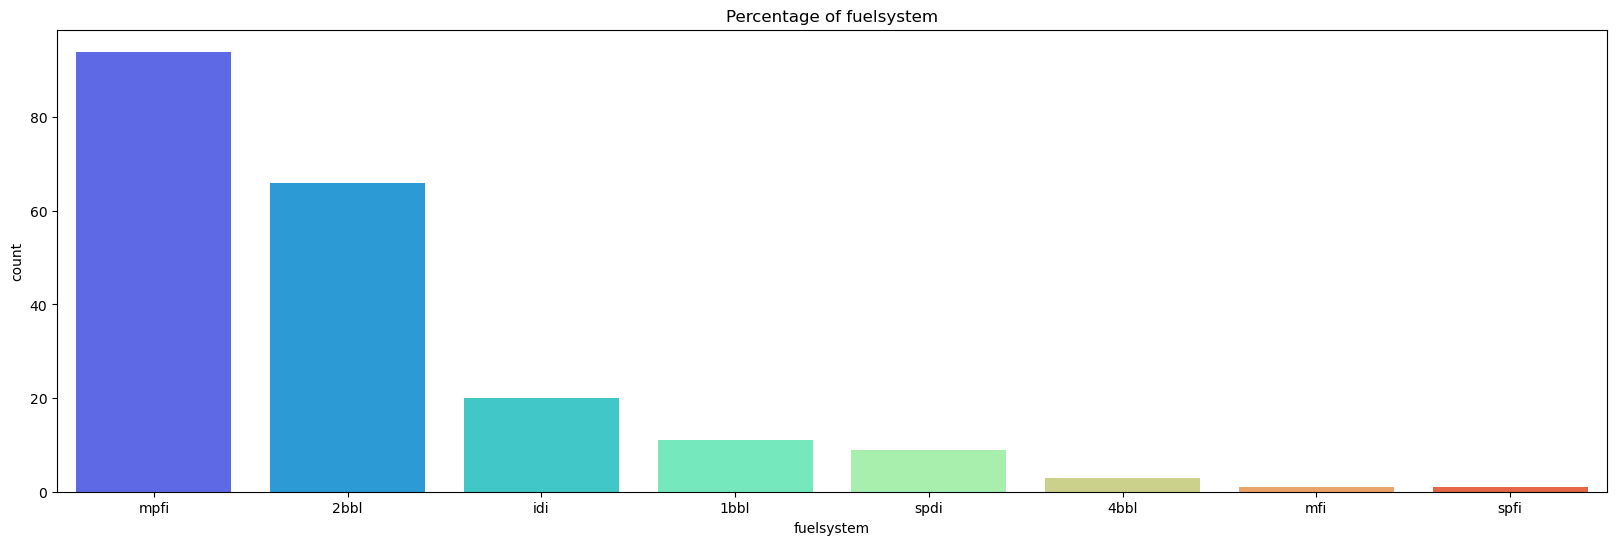

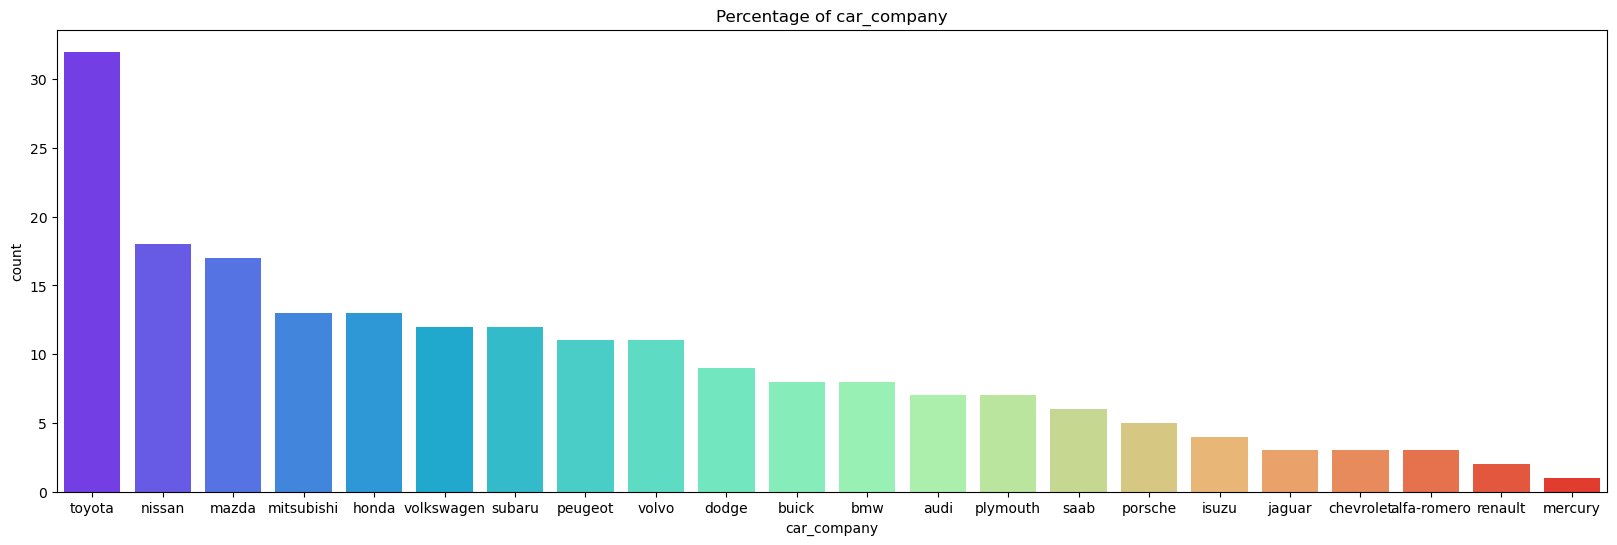

In [12]:
# Identifying categorical variables
categorical_variables = CarPrice.select_dtypes(include=['object']).columns.tolist()

# percentages for categorical variables
for var in categorical_variables:
    plt.figure(figsize=(20, 6))
    sns.countplot(data=CarPrice, x=var, palette="rainbow", order=CarPrice[var].value_counts().index)
    plt.title(f'Percentage of {var}')
    plt.show()

The analysis of categorical variables suggests that Toyota holds the highest popularity in the US market, making it the primary competitor for the Chinese company. Additionally, the majority of vehicles utilize the OHC engine type and are equipped with front engines. Considering these trends is essential for the Chinese company to effectively compete in the US market.

C:\Users\Hannah\AppData\Local\Temp\ipykernel_6996\30724551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CarPrice['carlength'])


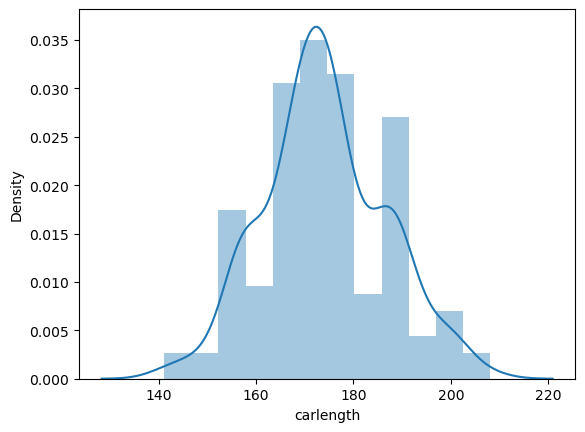

In [32]:
sns.distplot(CarPrice['carlength'])
plt.show()

Most cars have a length between 140 and 180 centimeters. The density is highest around 160 centimeters. Fewer cars are shorter than 140 centimeters or longer than 180 centimeters. The distribution appears to be bell-shaped. This suggests that most car lengths are close to the average, and there are fewer cars that are very short or very long.

C:\Users\Hannah\AppData\Local\Temp\ipykernel_6996\3167923811.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CarPrice['wheelbase'])


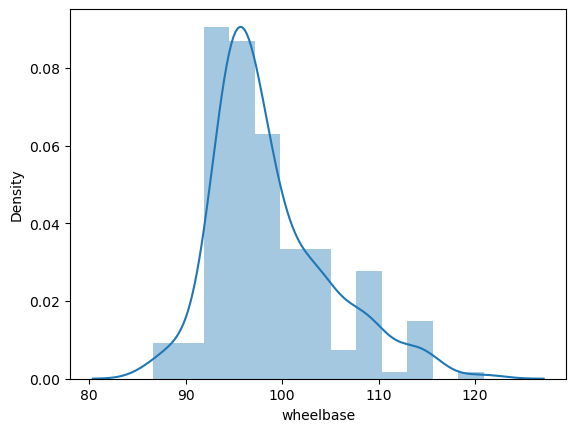

In [33]:
sns.distplot(CarPrice['wheelbase'])
plt.show()

The most frequent wheelbase length is around 100 inches.
There are fewer cars with longer or shorter wheelbases.
The distribution appears to be somewhat symmetrical, but there may be a slight tail towards the longer wheelbases

### Encoding the data

In [29]:

object_columns = CarPrice.select_dtypes(include='object').columns
carPrice=pd.get_dummies(CarPrice, columns=object_columns, drop_first=True, dtype=int)
carPrice.head() 

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [30]:
#dropping car_ID
carPrice.drop(['car_ID'],axis=1,inplace=True)

#### Scaling the dataset

## Data Processing

In [15]:
##Define the independents(X) and response(Y)
X = carPrice.drop(['price'], axis=1)
y = carPrice['price']

In [16]:
## now split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Model Implementation

In [17]:
##Importing the necessary packages to execute the model
from sklearn.linear_model import LinearRegression

In [18]:
##Executing
lm = LinearRegression()

In [19]:
##fitting the model into the train dataset, to train it
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
# intercept
print(lm.intercept_)

-1708.8013287712365


In [21]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df.transpose()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
Coefficient,-135.17935,254.791645,-119.841025,632.416638,-344.722888,6.685716,132.20559,-12469.935287,-1585.038695,-725.208515,...,2441.652435,-495.275773,-769.14955,8816.402549,2194.337727,8221.218522,-1128.502491,1388.22023,2682.302413,5331.819927


Observe carlength, it is clear that average price decreases by -119.841 for every 1 unit increase in carlength. We can interpret other variables the same.

### Testing the predictions

In [22]:
predictions = lm.predict(X_test)

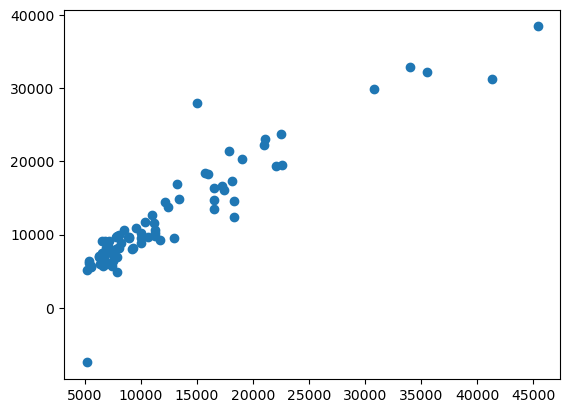

In [23]:
plt.scatter(y_test,predictions)

C:\Users\Hannah\AppData\Local\Temp\ipykernel_6996\3823792470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


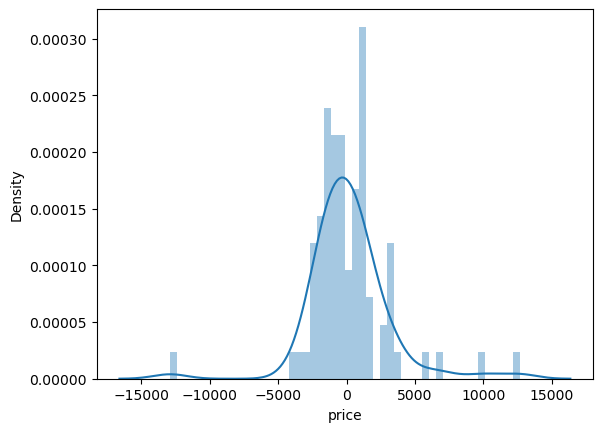

In [24]:
##residual plot
sns.distplot((y_test-predictions),bins=50);

The residual errors follow a normal distribution and have an approximate mean of 0.00.

In [37]:
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 1877.1073078914196
MSE: 8820415.72533532
RMSE: 2969.918471159658


#### MAE (Mean Absolute Error): The average absolute difference between predicted and actual values is approximately 1877.1.
#### MSE (Mean Squared Error): The average squared difference between predicted and actual values is approximately 8820415.7.
#### RMSE (Root Mean Squared Error): The square root of MSE, which indicates that the typical difference between predicted and actual values is approximately 2969.9.
In this case, the model's performance is evaluated by these metrics. Lower values indicate better performance, so ideally, we'd like to see these values minimized as much as possible

## Cross-validation and Bootstrapping:

In [38]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation (let's use k=5)
cv_scores = cross_val_score(lm, X, y, cv=5, scoring='r2')

# Convert scores to positive since sklearn returns negative MSE
cv_scores = cv_scores

print("Cross-validation  scores:", cv_scores)
print("Mean Cross-validation :", np.mean(cv_scores))

Cross-validation  scores: [ 0.51710173  0.84933645 -1.19261256  0.31988624 -0.90358878]
Mean Cross-validation : -0.08197538336845563


The average of all cross-validation scores. In this case, it is -0.082.A mean cross-validation score close to 0 indicates that the model's performance is relatively consistent across different subsets of the data.

In [44]:
from sklearn.metrics import mean_squared_error

bootstrap_MSE=[]
# Perform bootstrap resampling and train Random Forest on each sample
for _ in range(1000):
    # Generate a bootstrap sample
    bootstrap_indices = np.random.choice(X.index, size=len(X), replace=True)
    X_bootstrap = X.iloc[bootstrap_indices]
    y_bootstrap = y.iloc[bootstrap_indices]
    
    # lm on the bootstrap sample
    lm = LinearRegression()
    lm.fit(X_bootstrap, y_bootstrap)
    y_pred = lm.predict(X)
    
    # Evaluate the model on the original dataset
    MSE = mean_squared_error(y, y_pred)
    bootstrap_MSE.append(MSE)

# Calculate the mean and standard deviation of bootstrap sample accuracies
mean_accuracy = np.mean(bootstrap_MSE)
std_accuracy = np.std(bootstrap_MSE)

print("Mean accuracy:", mean_accuracy)
print("Standard deviation of accuracy:", std_accuracy)

Mean accuracy: 5214596.195014302
Standard deviation of accuracy: 2541241.1072302316


The high standard deviation of accuracy implies significant variability among accuracy scores across the bootstrap samples. This suggests that the model's performance may lack consistency when applied to new data, as it struggles to maintain uniform accuracy levels across different subsets of the dataset.

### Model Selection Techniques

#### Foward selection

#### Accuracy of foward 

In [45]:
from sklearn.feature_selection import SequentialFeatureSelector

In [46]:
# Define the number of features to select
num_features = min(len(X.columns) - 1, 5)  # Adjust this number as needed

# Execute Forward selection
selector = SequentialFeatureSelector(lm, n_features_to_select=num_features, direction='forward')
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.support_]

# Fit the linear regression model with the selected features
lm.fit(X[selected_features], y)

# Make predictions
y_pred = lm.predict(X[selected_features])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Print the selected features
print("Selected features using forward selection:", selected_features)

# Print the coefficients
print("Coefficients:", lm.coef_)

# Print the intercept
print("Intercept:", lm.intercept_)

# Print the Mean Squared Error (MSE)
print("Mean Squared Error (MSE):", mse)

Selected features using forward selection: Index(['carwidth', 'enginesize', 'stroke', 'car_company_bmw',
       'car_company_porsche'],
      dtype='object')
Coefficients: [ 1235.24620081   106.65840127 -1403.77041861  8333.83365486
 10393.42597769]
Intercept: -77680.25276508169
Mean Squared Error (MSE): 8155786.703978717


The model has recognized 'carwidth', 'enginesize', 'stroke', 'car_company_bmw', and 'car_company_porsche' as pivotal factors. This confirms the insights gained from exploratory data analysis (EDA), indicating their significant contribution to elucidating variations in price. Although the mean squared error (MSE) persists at a relatively high level, its decrease indicates progress in enhancing the model's accuracy in price prediction.

## Shrinkage Method

In [47]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [48]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as needed
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)


C:\Users\Hannah\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.600e+07, tolerance: 7.640e+05
  model = cd_fast.enet_coordinate_descent(


In [49]:
# MSE for Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Regression MSE:", lasso_mse)

Lasso Regression MSE: 8043794.015180324


In [52]:
# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value as needed
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

In [51]:
# MSE for Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Regression MSE:", ridge_mse)

Ridge Regression MSE: 5756183.19067931


##### The Lasso Regression has a higher MSE of 8043794.015180324.
##### The Ridge Regression has a lower MSE of 5756183.19067931.
##### Based on these MSE values, the Ridge Regression model appears to have better performance in this case, as it has a lower MSE compared to the Lasso Regression model.

## PLS

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score


In [63]:
# Get the loadings of the original predictor variables onto each component
component_loadings = pls_model.x_loadings_

# Get the column names of the original predictor variables
predictor_names = X.columns

# Print out the variables used by the final model along with their loadings
for component_idx, component_loading in enumerate(component_loadings.T):
    print(f"Component {component_idx + 1}:")
    sorted_indices = np.argsort(np.abs(component_loading))[::-1]  # Sort indices by absolute loading magnitude
    for i in sorted_indices:
        variable_name = predictor_names[i]
        loading = component_loading[i]
        print(f"Variable: {variable_name}, Loading: {loading:.4f}")
    print()

Component 1:
Variable: curbweight, Loading: 0.2982
Variable: carwidth, Loading: 0.2717
Variable: enginesize, Loading: 0.2713
Variable: carlength, Loading: 0.2631
Variable: highwaympg, Loading: -0.2623
Variable: horsepower, Loading: 0.2502
Variable: citympg, Loading: -0.2475
Variable: wheelbase, Loading: 0.2258
Variable: cylindernumber_four, Loading: -0.2256
Variable: drivewheel_rwd, Loading: 0.2211
Variable: drivewheel_fwd, Loading: -0.2121
Variable: boreratio, Loading: 0.2078
Variable: fuelsystem_2bbl, Loading: -0.2019
Variable: fuelsystem_mpfi, Loading: 0.1721
Variable: car_company_buick, Loading: 0.1506
Variable: enginetype_ohcv, Loading: 0.1475
Variable: enginetype_ohc, Loading: -0.1464
Variable: cylindernumber_six, Loading: 0.1365
Variable: car_company_jaguar, Loading: 0.1002
Variable: cylindernumber_five, Loading: 0.1001
Variable: carbody_hatchback, Loading: -0.0950
Variable: carheight, Loading: 0.0859
Variable: fueltype_gas, Loading: -0.0816
Variable: fuelsystem_idi, Loading: 0.

In conclusion, Ridge regression emerges as the preferred modeling approach for predicting car prices, as it offers improved predictive accuracy compared to other techniques such as forward selection and PLS regression. This is because  Ridge regression has the lowest MSE.